In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from scipy.stats import gaussian_kde

## Генерация случайных данных

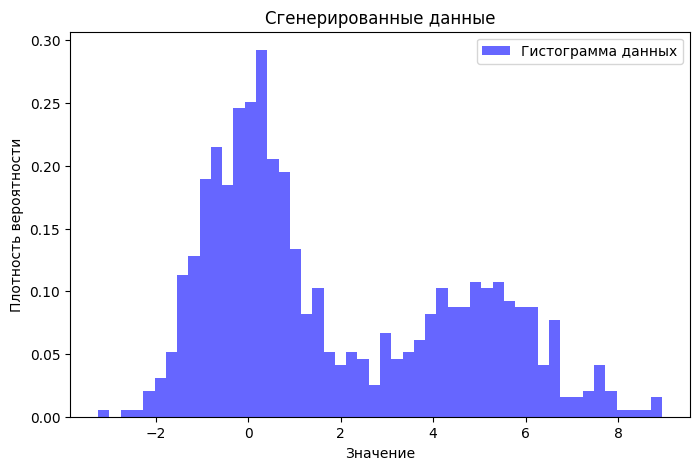

In [18]:
# Генерация случайных данных
np.random.seed(42)  # Для воспроизводимости
data = np.concatenate([
    np.random.normal(0, 1, 500),  # Нормальное распределение с центром в 0
    np.random.normal(5, 1.5, 300) # Нормальное распределение с центром в 5
])

# Визуализация данных
plt.figure(figsize=(8, 5))
plt.hist(data, bins=50, density=True, alpha=0.6, color='blue', label='Гистограмма данных')
plt.title('Сгенерированные данные')
plt.xlabel('Значение')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.show()

## EM-алгоритм

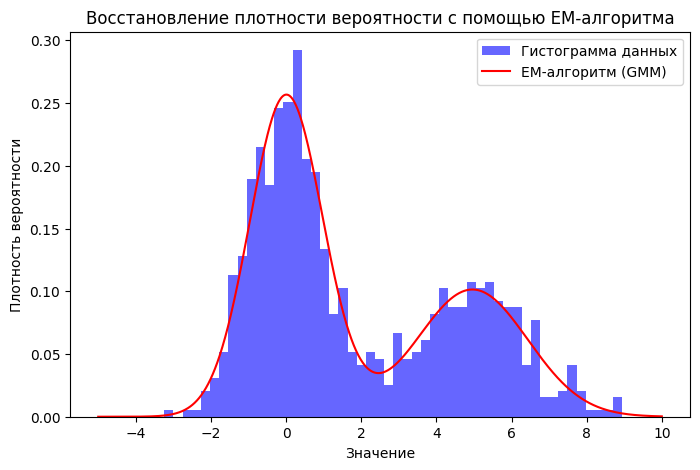

In [19]:
# Применение EM-алгоритма
gmm = GaussianMixture(n_components=2, random_state=42)  # Предполагаем 2 компоненты
gmm.fit(data.reshape(-1, 1))  # Подгонка модели

# Восстановление плотности вероятности
x = np.linspace(-5, 10, 1000)  # Диапазон для построения графика
log_prob = gmm.score_samples(x.reshape(-1, 1))  # Логарифм плотности вероятности
density = np.exp(log_prob)  # Экспонента для получения плотности вероятности

# Визуализация результата
plt.figure(figsize=(8, 5))
plt.hist(data, bins=50, density=True, alpha=0.6, color='blue', label='Гистограмма данных')
plt.plot(x, density, color='red', label='EM-алгоритм (GMM)')
plt.title('Восстановление плотности вероятности с помощью EM-алгоритма')
plt.xlabel('Значение')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.show()

## Метод 2: Ядерное сглаживание

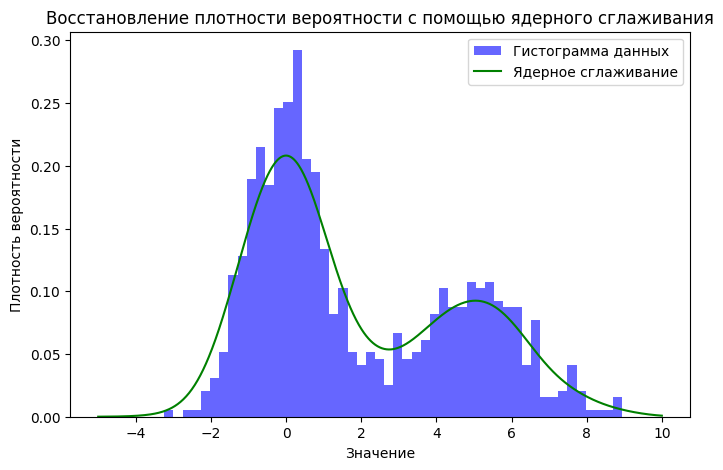

In [23]:
# Применение ядерного сглаживания
kde = gaussian_kde(data)  # Создание объекта ядерного сглаживания

# Восстановление плотности вероятности
x = np.linspace(-5, 10, 1000)  # Диапазон для построения графика
density = kde.evaluate(x)  # Плотность вероятности

# Визуализация результата
plt.figure(figsize=(8, 5))
plt.hist(data, bins=50, density=True, alpha=0.6, color='blue', label='Гистограмма данных')
plt.plot(x, density, color='green', label='Ядерное сглаживание')
plt.title('Восстановление плотности вероятности с помощью ядерного сглаживания')
plt.xlabel('Значение')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.show()

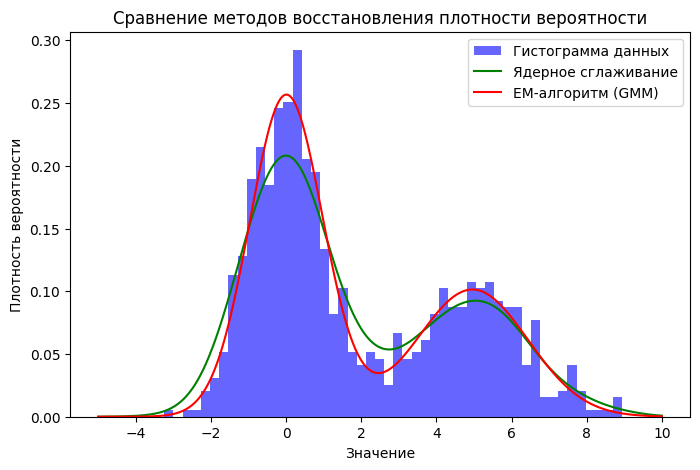

In [24]:
# сравнение данных
# Визуализация обоих методов
plt.figure(figsize=(8, 5))
plt.hist(data, bins=50, density=True, alpha=0.6, color='blue', label='Гистограмма данных')
plt.plot(x, density, color='green', label='Ядерное сглаживание')
plt.plot(x, np.exp(log_prob), color='red', label='EM-алгоритм (GMM)')
plt.title('Сравнение методов восстановления плотности вероятности')
plt.xlabel('Значение')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.show()

## Метрополиса-Гастингса

In [28]:
def metropolis_hastings(target_density, n_samples=10000, proposal_std=1.0, burn_in=1000):
    """
    Реализация алгоритма Метрополиса-Гастингса.
    
    :param target_density: Целевая плотность вероятности.
    :param n_samples: Количество сэмплов для генерации.
    :param proposal_std: Стандартное отклонение предложного распределения.
    :param burn_in: Количество итераций для "прогрева" цепи.
    :return: Сгенерированная выборка.
    """
    samples = []
    current_x = 0.0  # Начальное значение

    for i in range(n_samples + burn_in):
        # Предложение нового значения из нормального распределения
        proposed_x = np.random.normal(current_x, proposal_std)
        
        # Вычисление отношения целевых плотностей
        acceptance_ratio = target_density(proposed_x) / target_density(current_x)
        
        # Принятие или отклонение предложенного значения
        if np.random.rand() < acceptance_ratio:
            current_x = proposed_x
        
        # Сохранение сэмпла после прогрева
        if i >= burn_in:
            samples.append(current_x)
    
    return np.array(samples)

## Метод Гиббса

In [29]:
def gibbs_sampling(target_density, n_samples=10000, proposal_std=1.0, burn_in=1000):
    """
    Реализация алгоритма Гиббса для одномерного распределения.
    
    :param target_density: Целевая плотность вероятности.
    :param n_samples: Количество сэмплов для генерации.
    :param proposal_std: Стандартное отклонение предложного распределения.
    :param burn_in: Количество итераций для "прогрева" цепи.
    :return: Сгенерированная выборка.
    """
    samples = []
    current_x = 0.0  # Начальное значение

    for i in range(n_samples + burn_in):
        # Предложение нового значения из нормального распределения
        proposed_x = np.random.normal(current_x, proposal_std)
        
        # Вычисление отношения целевых плотностей
        acceptance_ratio = target_density(proposed_x) / target_density(current_x)
        
        # Принятие или отклонение предложенного значения
        if np.random.rand() < acceptance_ratio:
            current_x = proposed_x
        
        # Сохранение сэмпла после прогрева
        if i >= burn_in:
            samples.append(current_x)
    
    return np.array(samples)

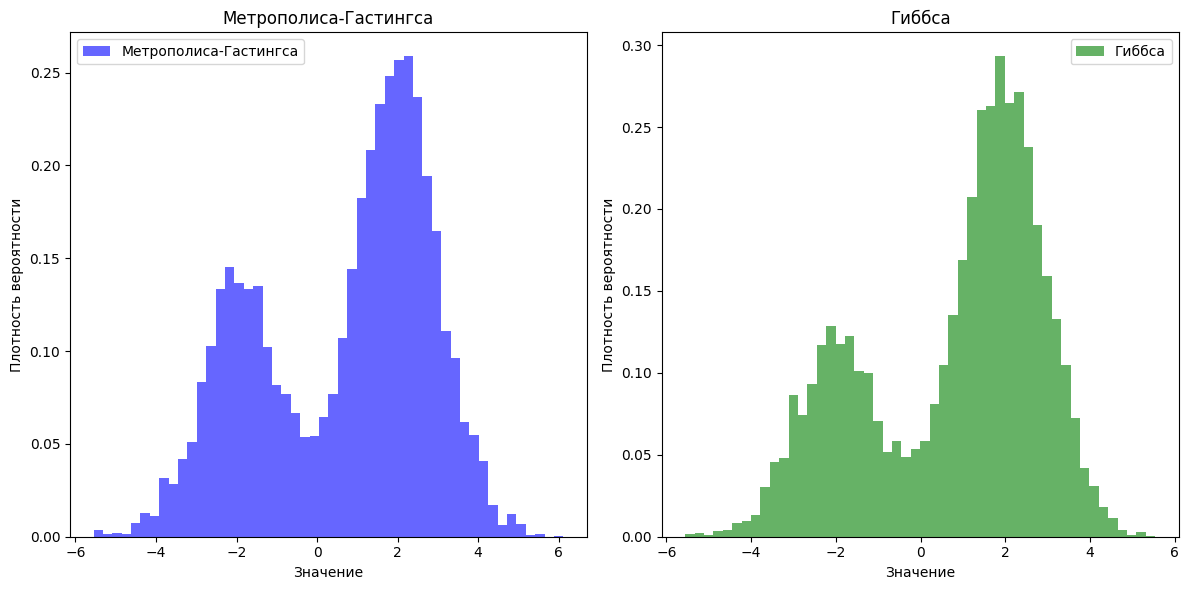

In [30]:
# Генерация выборки с помощью Метрополиса-Гастингса
mh_samples = metropolis_hastings(target_density, n_samples=10000, proposal_std=1.0)

# Генерация выборки с помощью Гиббса
gibbs_samples = gibbs_sampling(target_density, n_samples=10000, proposal_std=1.0)

# Визуализация результатов
plt.figure(figsize=(12, 6))

# Гистограмма для Метрополиса-Гастингса
plt.subplot(1, 2, 1)
plt.hist(mh_samples, bins=50, density=True, alpha=0.6, color='blue', label='Метрополиса-Гастингса')
plt.title('Метрополиса-Гастингса')
plt.xlabel('Значение')
plt.ylabel('Плотность вероятности')
plt.legend()

# Гистограмма для Гиббса
plt.subplot(1, 2, 2)
plt.hist(gibbs_samples, bins=50, density=True, alpha=0.6, color='green', label='Гиббса')
plt.title('Гиббса')
plt.xlabel('Значение')
plt.ylabel('Плотность вероятности')
plt.legend()

plt.tight_layout()
plt.show()